# 绘图功能

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 分散式数据集可视化
Visualizing the distribution of a dataset

http://seaborn.pydata.org/tutorial/distributions.html

In [2]:
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns
sns.set(color_codes=True)

In [4]:
# 设置随机变数种子
np.random.seed(sum(map(ord, "distributions")))

```
sns.distplot(a,   # Series, 1d-array, or list.
    bins=None,    # argument for matplotlib hist(), or None, optional
    hist=True,    # bool, Whether to plot a (normed) histogram.
    kde=True,     # bool, Whether to plot a gaussian kernel density estimate.
    rug=False,    # bool, Whether to draw a rugplot on the support axis.
    fit=None,     # An object with `fit` method
    hist_kws=None,# Keyword arguments for hist
    kde_kws=None, # Keyword arguments for kde
    rug_kws=None, # Keyword arguments for rug
    fit_kws=None, # Keyword arguments for fit
    color=None,   # Color to plot everything but the fitted curve in.
    vertical=False,
    norm_hist=False,
    axlabel=None,
    label=None,
    ax=None)
```

### 单变数分布绘图

In [5]:
# 产生数据集
x = np.random.normal(size=100)

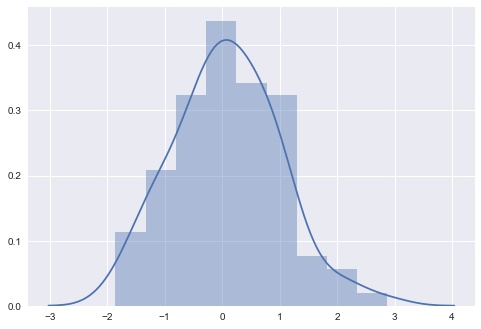

In [6]:
sns.distplot(x);

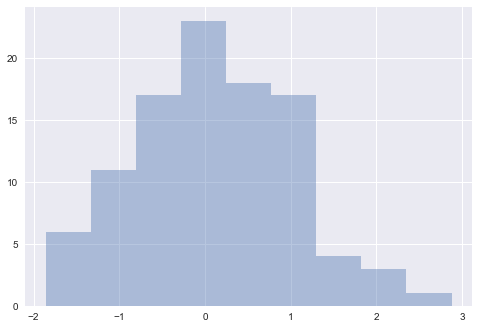

In [7]:
# 柱状图
sns.distplot(x, kde=False, rug=False);

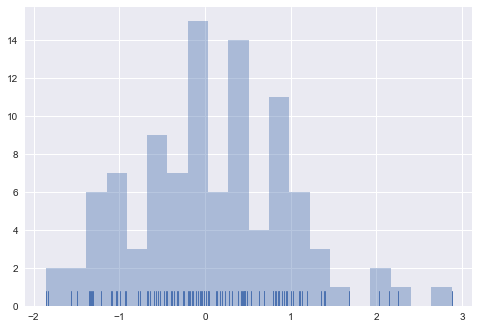

In [8]:
# 画出样本点
sns.distplot(x, bins=20, kde=False, rug=True);

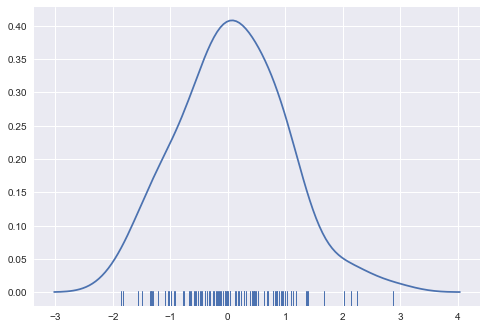

In [9]:
# KDE 核密度估计
sns.distplot(x, hist=False, rug=True);

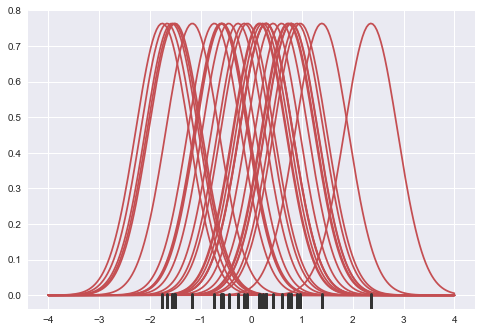

In [10]:
x = np.random.normal(0, 1, size=30)
bandwidth = 1.06 * x.std() * x.size ** (-1 / 5.)
support = np.linspace(-4, 4, 200)

kernels = []
for x_i in x:

    kernel = stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color="r")

# 标识x
sns.rugplot(x, color=".2", linewidth=3);

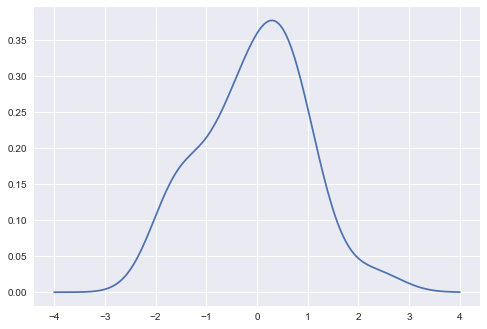

In [11]:
density = np.sum(kernels, axis=0)
density /= integrate.trapz(density, support)
plt.plot(support, density);

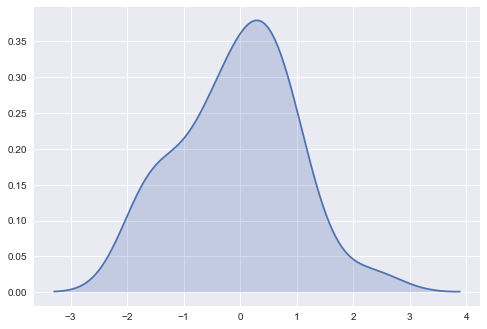

In [12]:
# 简化 sns.distplot(x, hist=False, kde_kws={'shade':True})
sns.kdeplot(x, shade=True);

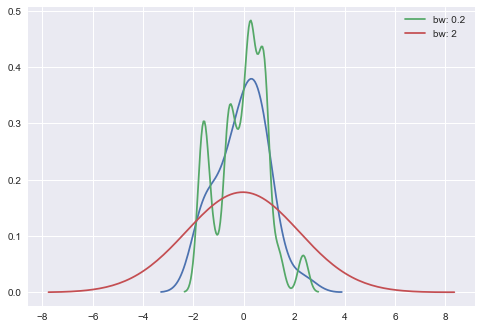

In [13]:
sns.kdeplot(x)
sns.kdeplot(x, bw=.2, label="bw: 0.2")
sns.kdeplot(x, bw=2, label="bw: 2")
plt.legend();

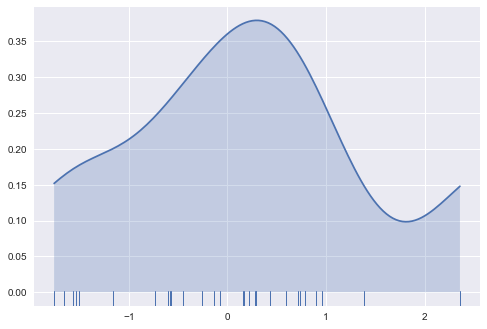

In [14]:
sns.kdeplot(x, shade=True, cut=0)
sns.rugplot(x);

#### 分布匹配

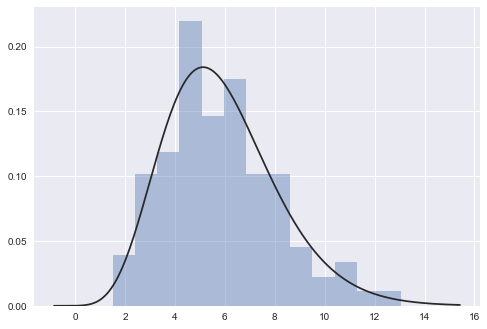

In [15]:
x = np.random.gamma(6, size=200)
sns.distplot(x, kde=False, fit=stats.gamma);

### 双变数分布绘图

```
sns.jointplot(
    x, y,              # Data or names of variables in ``data``
    data=None,         # DataFrame when ``x`` and ``y`` are variable names.
    kind='scatter',    # { "scatter" | "reg" | "resid" | "kde" | "hex" }
    stat_func=<function pearsonr at 0x11212d230>,
    color=None,        # Color used for the plot elements
    size=6,            # Size of the figure 
    ratio=5,           # Ratio of joint axes size to marginal axes height.
    space=0.2,         # Space between the joint and marginal axes
    dropna=True,       # If True, remove observations that are missing from ``x`` and ``y``.
    xlim=None,         # x-axis limit to set before plotting.
    ylim=None,         # y-axis limit to set before plotting.
    joint_kws=None,    # Additional keyword arguments for the plot components.
    marginal_kws=None, # Additional keyword arguments for the plot components.
    annot_kws=None,    # Additional keyword arguments for the plot components.
    **kwargs)
```

In [16]:
mean, cov = [0, 1], [(1, .8), (.8, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

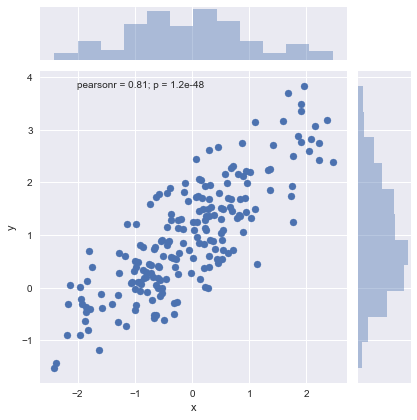

In [17]:
# 散点图
sns.jointplot(x="x", y="y", data=df);

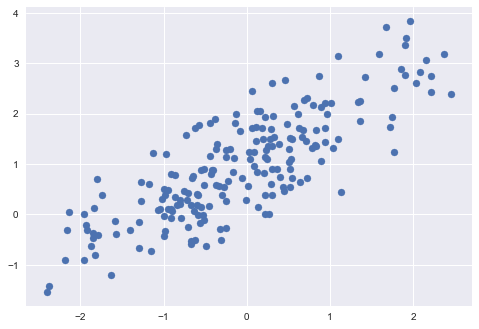

In [18]:
# 用 matplotlib 画出类似的
plt.scatter(df.x, df.y)

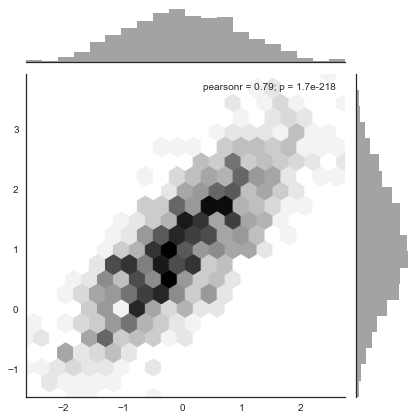

In [19]:
# 蜂窝图
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k");

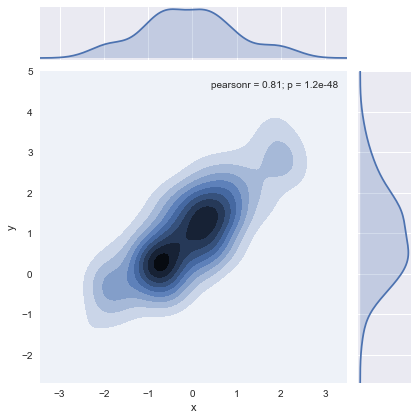

In [20]:
# 核密度
sns.jointplot(x="x", y="y", data=df, kind="kde");

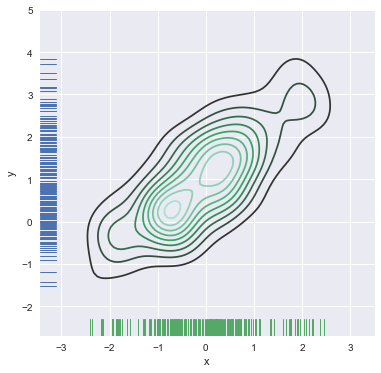

In [21]:
# kde + rug
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(df.x, df.y, ax=ax)
sns.rugplot(df.x, color="g", ax=ax)
sns.rugplot(df.y, vertical=True, ax=ax);

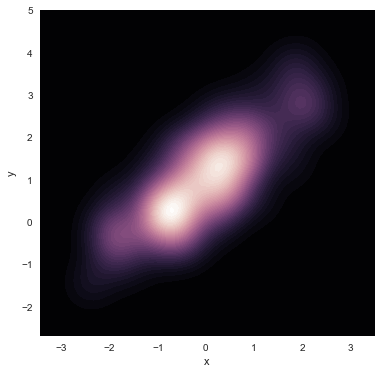

In [22]:
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df.x, df.y, cmap=cmap, n_levels=60, shade=True);

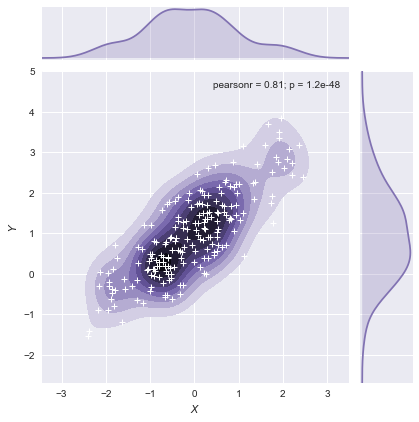

In [23]:
g = sns.jointplot(x="x", y="y", data=df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");

### Visualizing pairwise relationships in a dataset

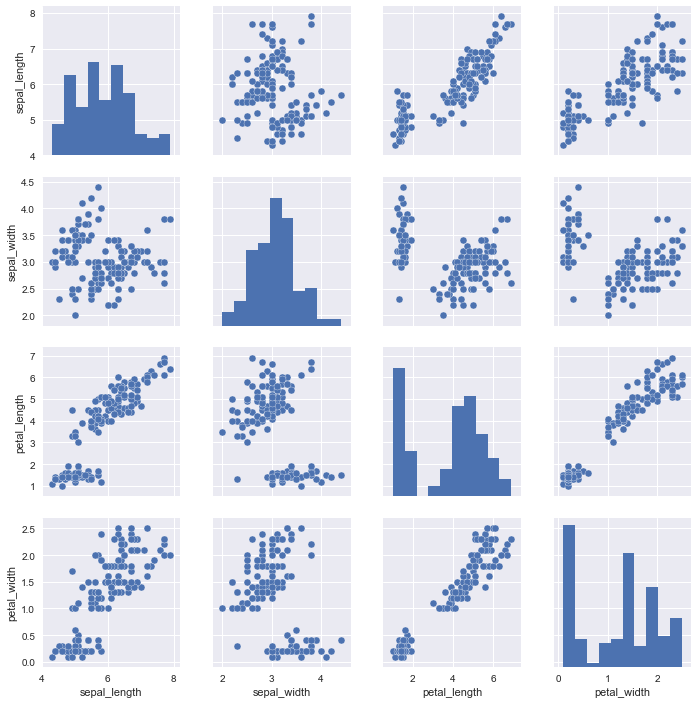

In [24]:
iris = sns.load_dataset("iris")
sns.pairplot(iris);

/Users/ruwang/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


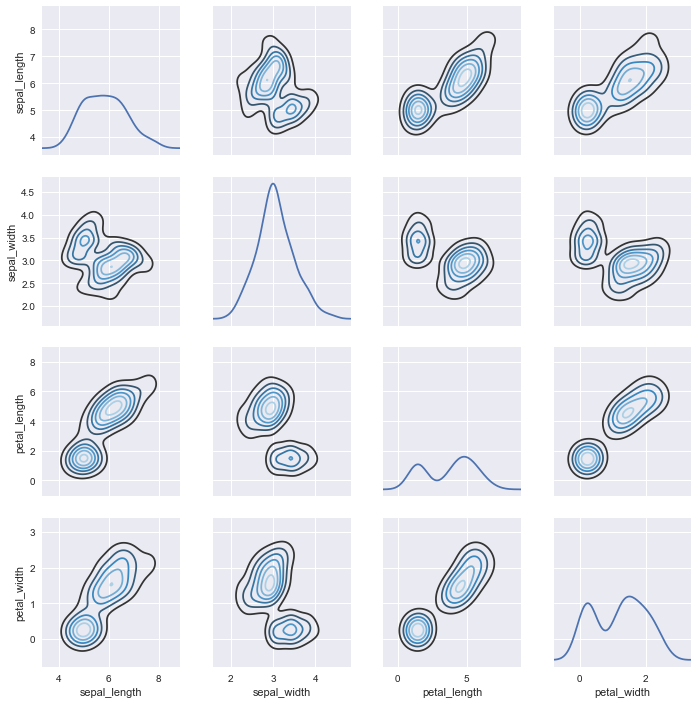

In [25]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=6);

## 线性关系可视化

In [26]:
import seaborn as sns
sns.set(color_codes=True)

In [27]:
np.random.seed(sum(map(ord, "regression")))

In [28]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 线性回归模型绘画函数

线性回归模型有两种绘图方式：`regplot()` 与 `lmplot()`

最简单的应用，两个函数都画出 x, y 变量的散点图与 y ~ x 的回归模型（回归线与 95% 信心区间）

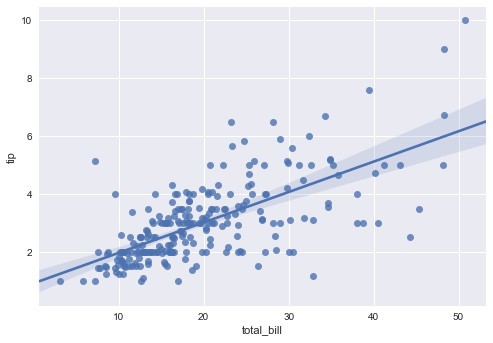

In [29]:
# regplot() accepts the x and y variables in a variety of formats including simple numpy arrays, pandas Series objects, or as references to variables in a pandas DataFrame object passed to data
sns.regplot(x="total_bill", y="tip", data=tips);

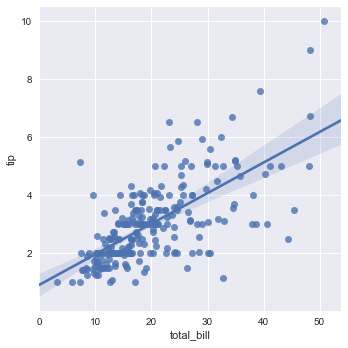

In [30]:
# lmplot() has data as a required parameter and the x and y variables must be specified as strings
sns.lmplot(x="total_bill", y="tip", data=tips);

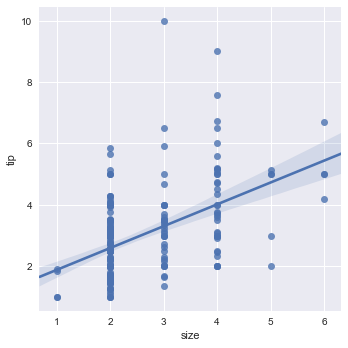

In [31]:
# 当其中一个变数是离散数据，散点图通常没有最佳化
sns.lmplot(x="size", y="tip", data=tips);

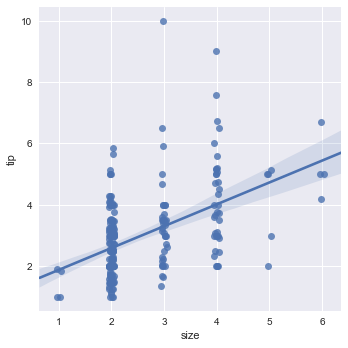

In [32]:
# 加一点杂讯在离散数据上，让分布更清楚
sns.lmplot(x="size", y="tip", data=tips, x_jitter=0.05);

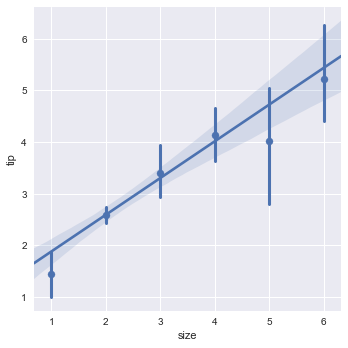

In [33]:
# 在每个离散点折叠变量观察值（例如平均），沿着信心区间画出中心趋势的评估
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean);

### 适配不同模型

简单线性回归模型不适用于某些数据集。

In [34]:
anscombe = sns.load_dataset("anscombe")

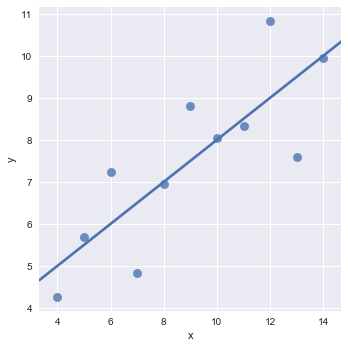

In [35]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
           ci=None, scatter_kws={"s": 80});

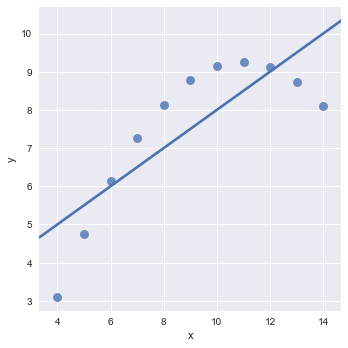

In [36]:
# 线性关系不适用于这个数据集
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           ci=None, scatter_kws={"s": 80});

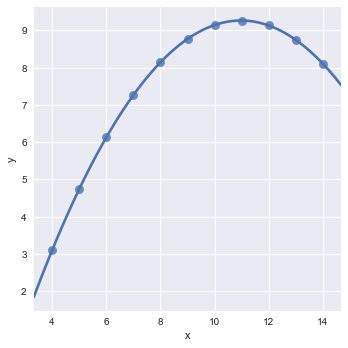

In [37]:
# 适配多项式回归模型
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           order=2, ci=None, scatter_kws={"s": 80});

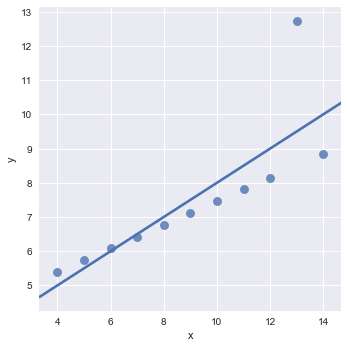

In [38]:
# “outlier” 影响适配结果
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           ci=None, scatter_kws={"s": 80});

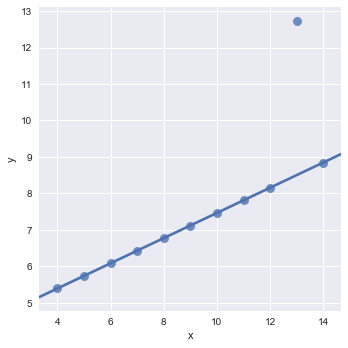

In [39]:
# 使用 robust 忽略 outlier
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           robust=True, ci=None, scatter_kws={"s": 80});

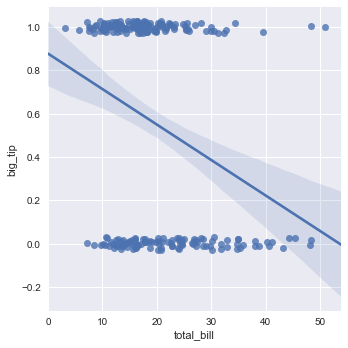

In [40]:
# 当 Y 值是二元，简单线性回归预测显得不合理
tips["big_tip"] = (tips.tip / tips.total_bill) > .15

sns.lmplot(x="total_bill", y="big_tip", data=tips,
           y_jitter=.03);

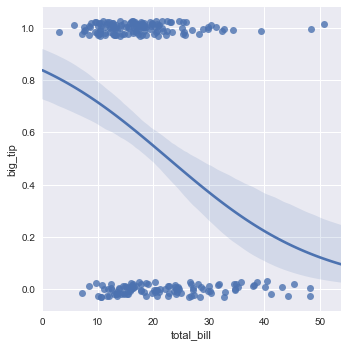

In [41]:
# 使用 logistic regression 适配
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           logistic=True, y_jitter=.03);

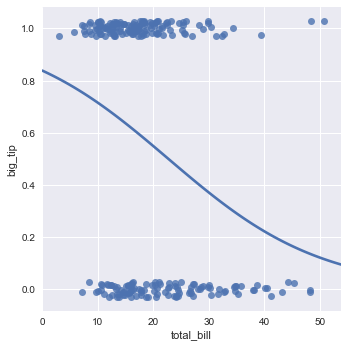

In [42]:
# 使用 logistic regression 计算量较大，可以不显示信心区间（ci=None）以缩短计算时间
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           ci=None, logistic=True, y_jitter=.03);

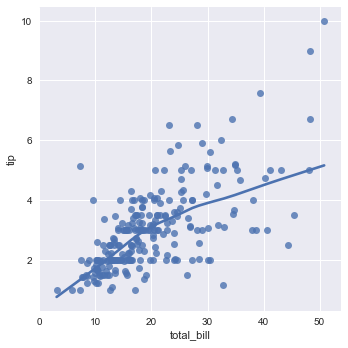

In [43]:
# 使用 lowess smoother 适配非参数回归模型（nonparametric regression）
sns.lmplot(x="total_bill", y="tip", data=tips,
           lowess=True);

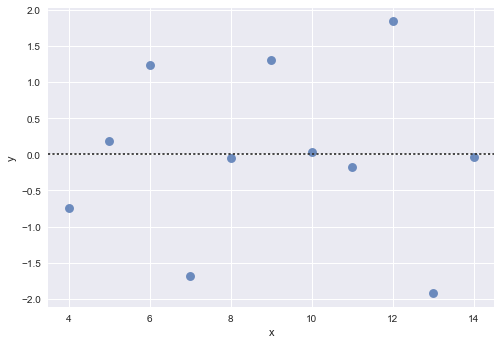

In [44]:
# 使用 residplot() 检查简单回归模型是否适配数据集
# residplot() 适配并移除简单回归模型，并画出剩余观察值，如果适配的话，画出来的点随机散布在y=0附近
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
              scatter_kws={"s": 80});

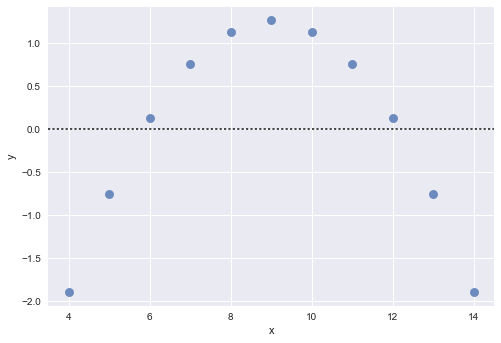

In [45]:
# 如果剩余点不是随机散布（有形状），使用简单线性回归可能不适合
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
              scatter_kws={"s": 80});

### 控制图形的大小与形状

线性回归用来发掘两个变两者之间的关系。但更想知道的是“两变量间关系随着第三个变量如何变化”？

这显示出 `regplot()` 与 `lmplot()` 的不同。`regplot()` 只是显示简单的关系，`lmplot()` 结合 `regplot()` 与 `FaceGrid` 用“faceted”图形显示线性关系，让你发掘与第三变量的交互关系。

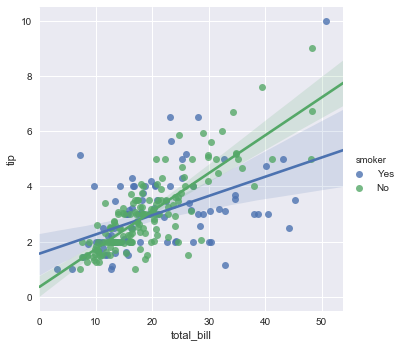

In [46]:
# 使用颜色区别第三个变量的影响
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips);

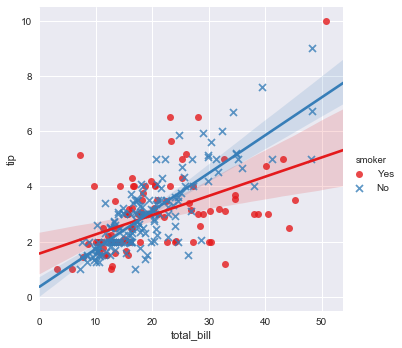

In [47]:
# 使用不同颜色、标识显示散点
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips,
           markers=["o", "x"], palette="Set1");

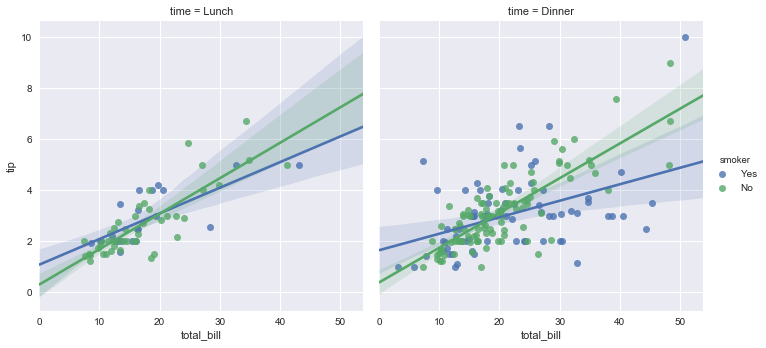

In [48]:
# 画出多个 facet 显示第四个变量的影响
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips);

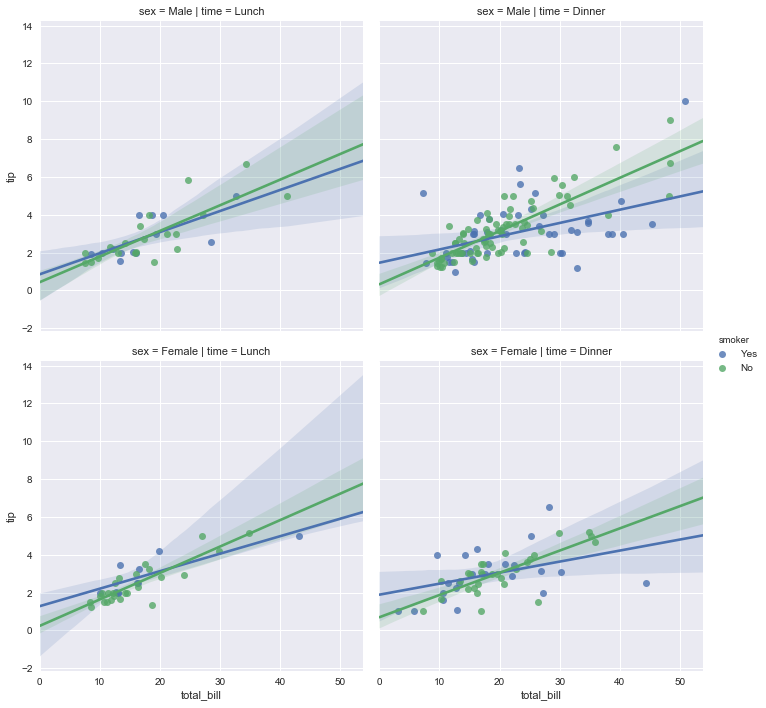

In [49]:
# 画出 facet grid 显示第四、五个变量的影响
sns.lmplot(x="total_bill", y="tip", hue="smoker",
           col="time", row="sex", data=tips);

### 控制图形尺寸与形状

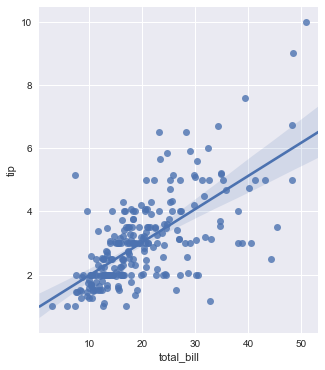

In [50]:
# 自行产生图片，控制大小
f, ax = plt.subplots(figsize=(5, 6))
sns.regplot(x="total_bill", y="tip", data=tips, ax=ax);

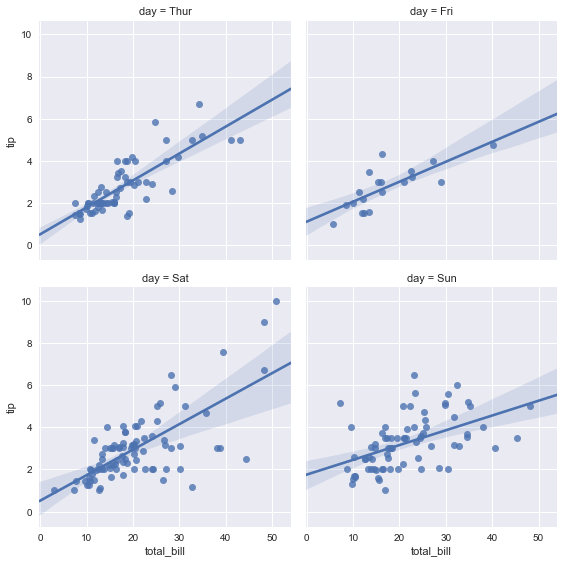

In [51]:
# 通过 size 控制图片尺寸
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           col_wrap=2, size=4);

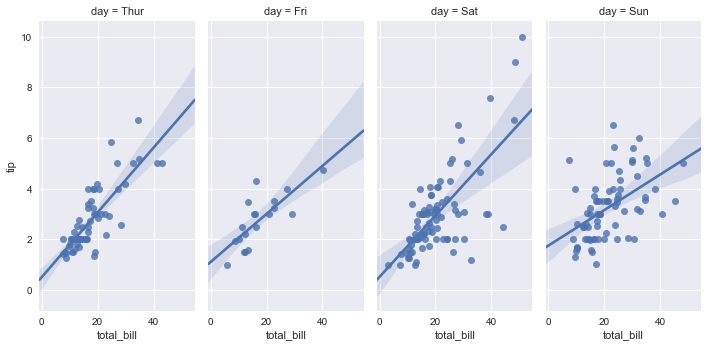

In [52]:
# 通过 aspect 控制图片比例
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           aspect=.5);

### 在其他 context 画出回归关系

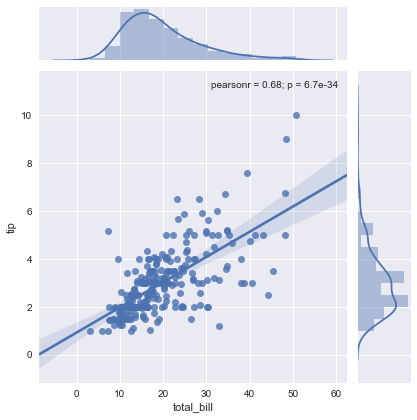

In [53]:
# 在 jointplot() 使用 kind="reg" 参数显示线性适配
sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg");

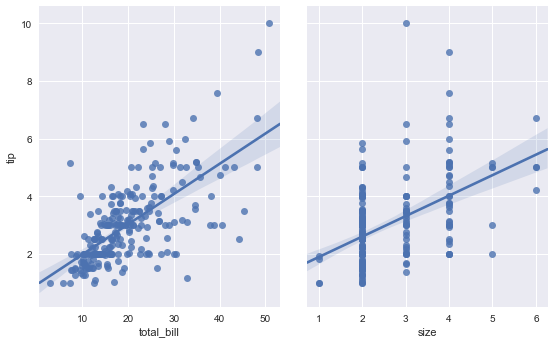

In [54]:
# 在 pairplot() 使用 kind="reg" 参数显示线性适配
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             size=5, aspect=.8, kind="reg");

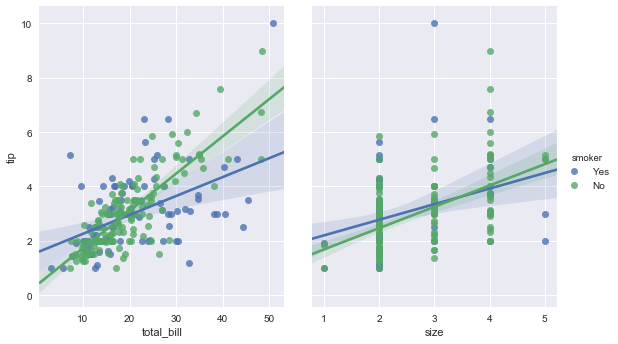

In [55]:
# 在 pairplot() 使用 hue 参数显示额外“类别"变数的影响
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             hue="smoker", size=5, aspect=.8, kind="reg");

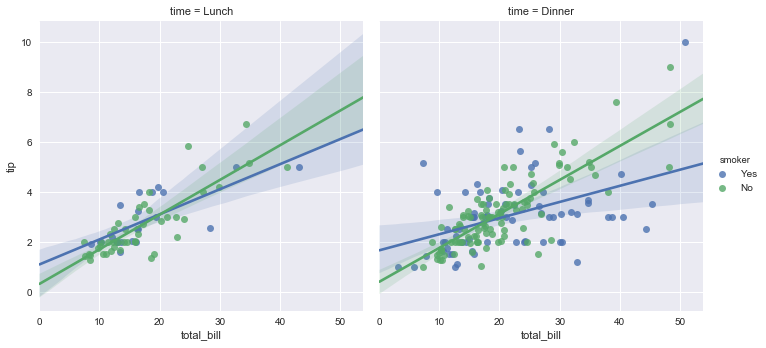

In [56]:
# 和 lmplot 比较
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips);

## 类别数据的绘画

In [57]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [58]:
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

In [59]:
np.random.seed(sum(map(ord, "categorical")))

In [60]:
titanic = sns.load_dataset("titanic")
tips = sns.load_dataset("tips")
iris = sns.load_dataset("iris")

### 类别散点图

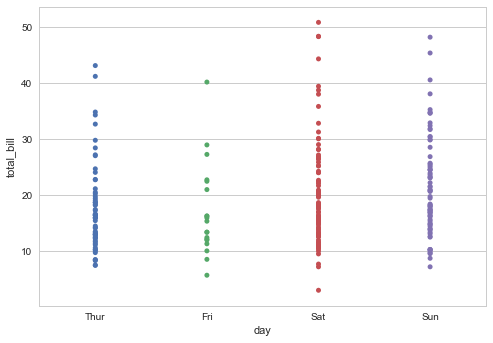

In [61]:
sns.stripplot(x="day", y="total_bill", data=tips);

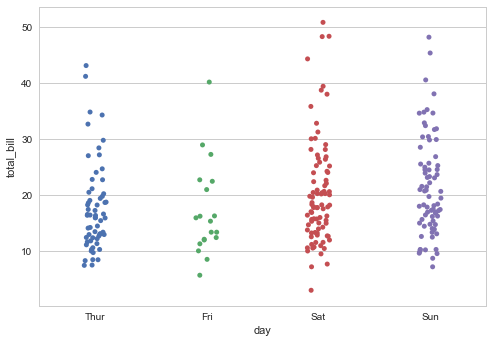

In [62]:
# 通常散点会重叠，使用 jitter 将散点错开
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True);

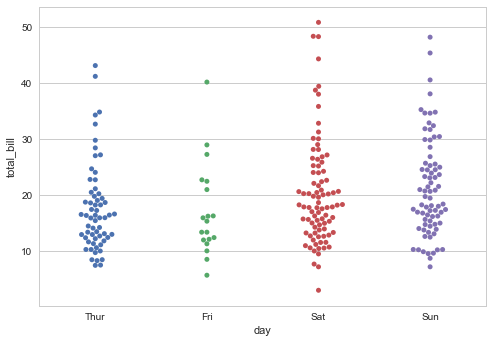

In [63]:
# 使用 swarmplot 将重叠的散点错开
sns.swarmplot(x="day", y="total_bill", data=tips);

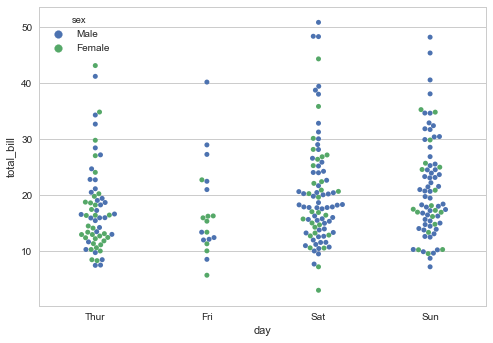

In [64]:
# 使用 hue 透过颜色、位置显示第三个变量的影响
sns.swarmplot(x="day", y="total_bill", hue="sex", data=tips);

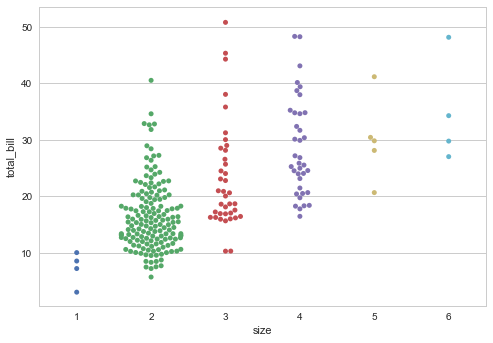

In [65]:
# 字符串类别依照出现顺序绘画，数值类别则依照大小顺序画出
sns.swarmplot(x="size", y="total_bill", data=tips);

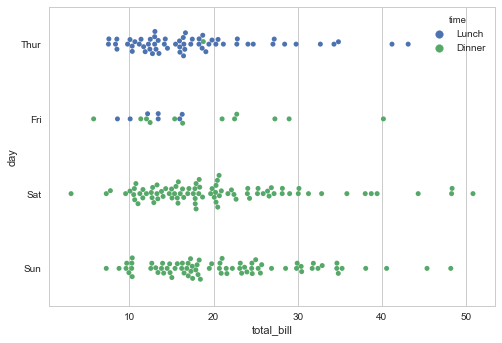

In [66]:
# 转个方向
sns.swarmplot(x="total_bill", y="day", hue="time", data=tips);

### 观察类别资料的分布

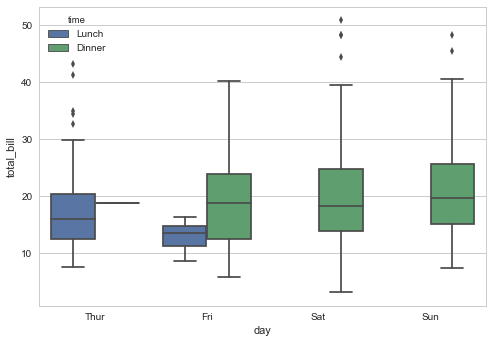

In [67]:
# 箱型图
sns.boxplot(x="day", y="total_bill", hue="time", data=tips);

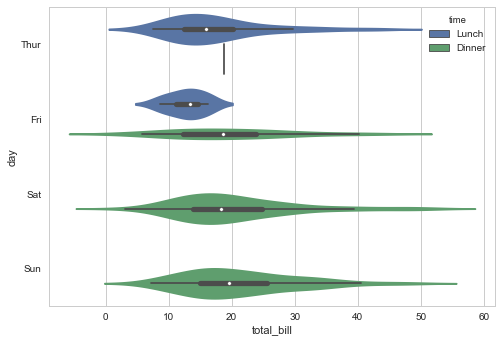

In [68]:
# 小提琴图
sns.violinplot(x="total_bill", y="day", hue="time", data=tips);

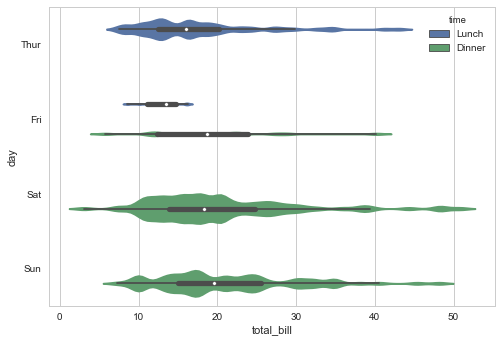

In [69]:
# 使用 kde 更贴切描述分布情况
sns.violinplot(x="total_bill", y="day", hue="time", data=tips,
               bw=.1, scale="count", scale_hue=False);

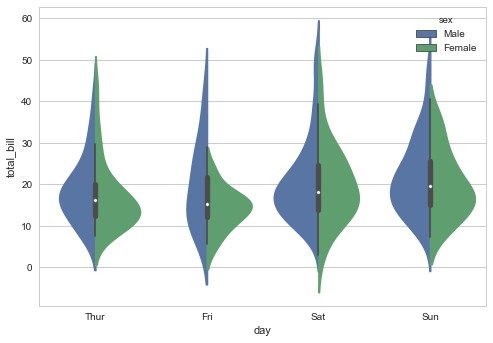

In [70]:
# 使用 split 显示第三个变量（只有两个level）
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, split=True);

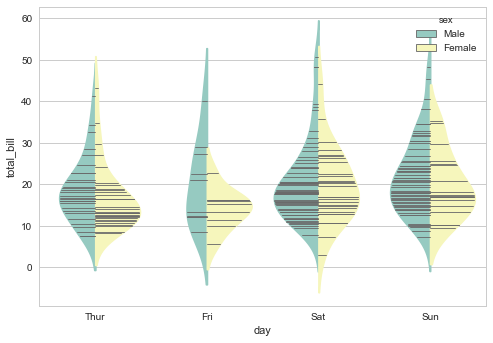

In [71]:
# 使用 inner 显示个别观察点
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips,
               split=True, inner="stick", palette="Set3");

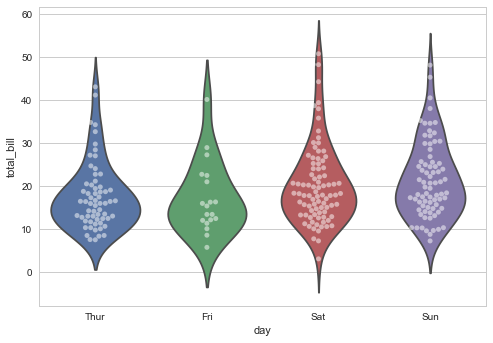

In [72]:
# 组合技
sns.violinplot(x="day", y="total_bill", data=tips, inner=None)
sns.swarmplot(x="day", y="total_bill", data=tips, color="w", alpha=.5);

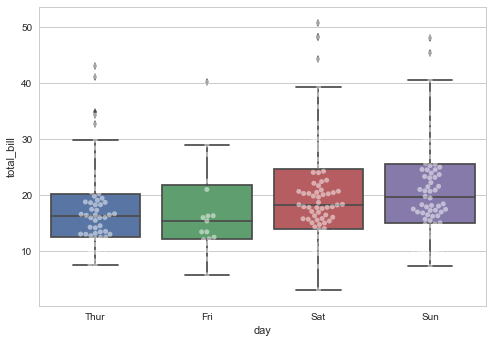

In [73]:
sns.boxplot(x="day", y="total_bill", data=tips)
sns.swarmplot(x="day", y="total_bill", data=tips, color="w", alpha=.5);

###  类别统计估计

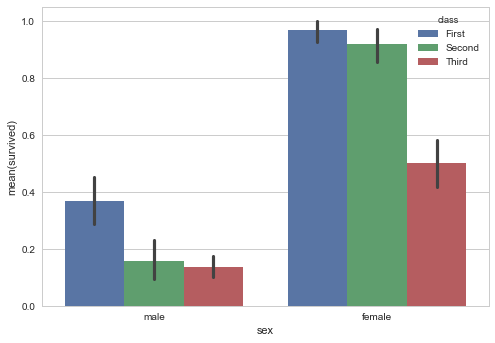

In [74]:
# 柱状图：使用 bootstraping 计算信心区间
sns.barplot(x="sex", y="survived", hue="class", data=titanic);

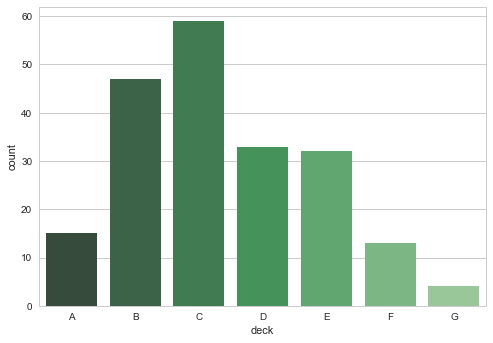

In [75]:
# 显示每个类别的观察资料
sns.countplot(x="deck", data=titanic, palette="Greens_d");

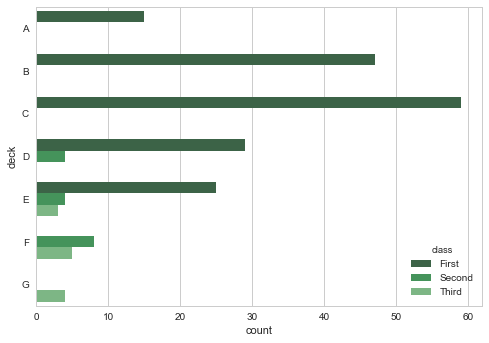

In [76]:
sns.countplot(y="deck", hue="class", data=titanic, palette="Greens_d");

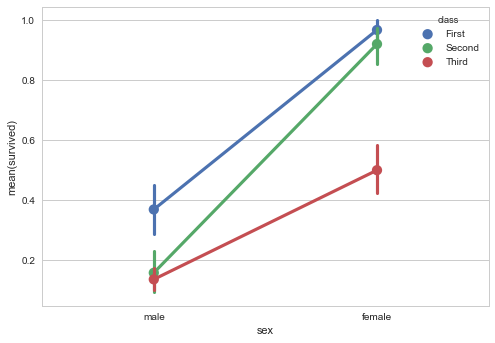

In [77]:
# 点图
sns.pointplot(x="sex", y="survived", hue="class", data=titanic);

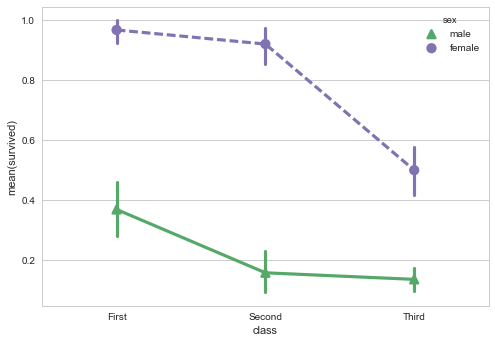

In [78]:
# 自定义颜色、标记
sns.pointplot(x="class", y="survived", hue="sex", data=titanic,
              palette={"male": "g", "female": "m"},
              markers=["^", "o"], linestyles=["-", "--"]);

### 长格式数据绘图

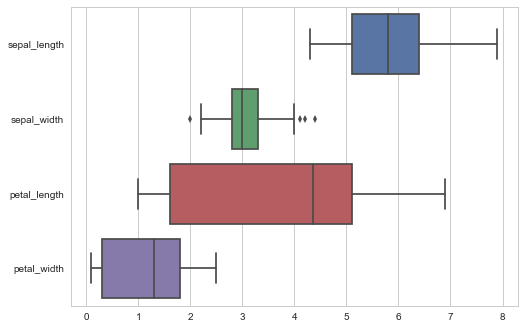

In [79]:
# 横向箱型图
sns.boxplot(data=iris, orient="h");

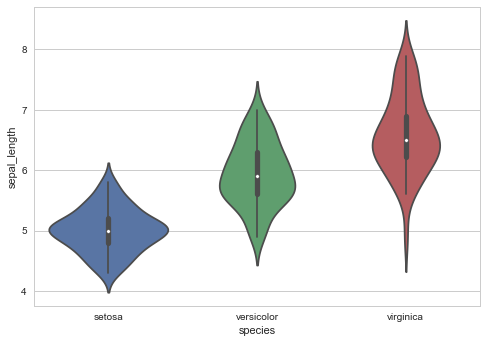

In [80]:
# 小提琴图
sns.violinplot(x=iris.species, y=iris.sepal_length);

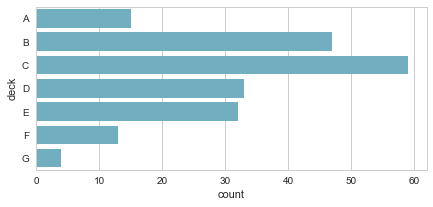

In [81]:
# 控制图片尺寸
f, ax = plt.subplots(figsize=(7, 3))
sns.countplot(y="deck", data=titanic, color="c");

### 多类别数据绘图

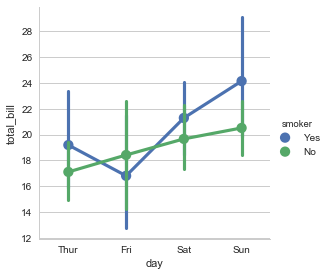

In [82]:
sns.factorplot(x="day", y="total_bill", hue="smoker", data=tips);

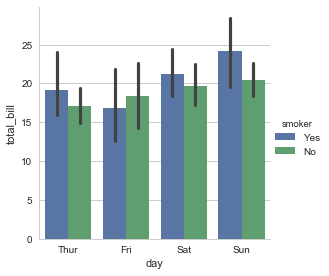

In [83]:
sns.factorplot(x="day", y="total_bill", hue="smoker", data=tips, kind="bar");

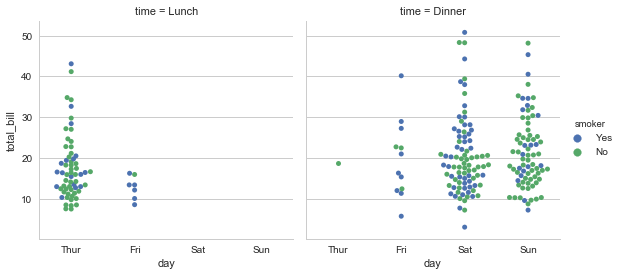

In [84]:
# 呈现第四个维度（time）
sns.factorplot(x="day", y="total_bill", hue="smoker",
               col="time", data=tips, kind="swarm");

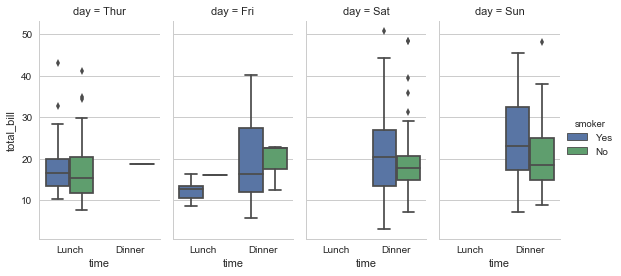

In [85]:
# 控制子图的尺寸与比例
sns.factorplot(x="time", y="total_bill", hue="smoker",
               col="day", data=tips, kind="box", size=4, aspect=.5);

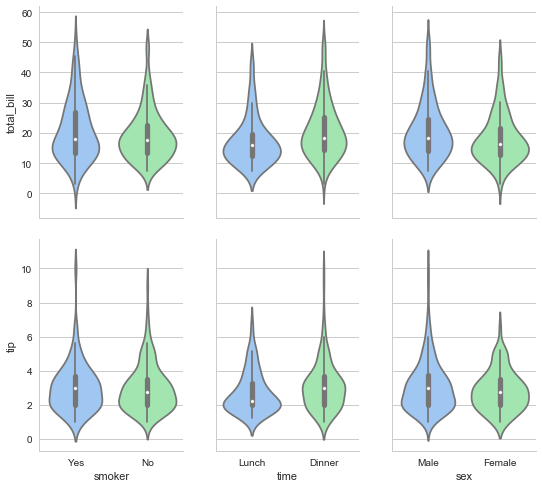

In [86]:
# 使用 PariGrid 显示不同变数间的类别关系
g = sns.PairGrid(tips,
                 x_vars=["smoker", "time", "sex"],
                 y_vars=["total_bill", "tip"],
                 aspect=.75, size=3.5)
g.map(sns.violinplot, palette="pastel");